## Color quantization

<font size= "3">Color quantization is the process of reducing the number of distinct colors in an image.

Normally, the intent is to preserve the color appearance of the image as much as possible, while reducing the number of colors, whether for memory limitations or compression.


</font>

## Color Quantization with Skimage

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from skimage.io import imread
from sklearn.utils import shuffle
from skimage import img_as_float
from time import time

((0.0, 1.0, 0.0, 1.0),
 Text(0.5, 1.0, 'Original image (254 colors)'),
 <matplotlib.image.AxesImage at 0x7f8e99aff358>)

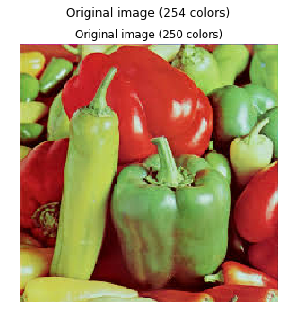

In [2]:
pepper = imread("./images/input/veg.png")

# Display the original image
plt.figure(1), plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off'), plt.title('Original image (%d colors)' %(len(np.unique(pepper)))), plt.imshow(pepper)

In [3]:
n_colors = 64

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
pepper = np.array(pepper, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(pepper.shape)
assert d == 3
image_array = np.reshape(pepper, (w * h, d))

In [4]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

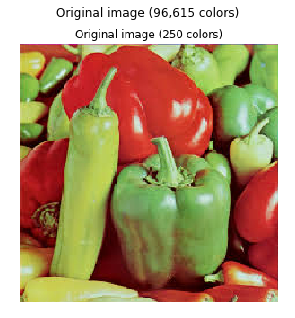

In [5]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(pepper)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


done in 0.301s.
Predicting color indices on the full image (k-means)
done in 0.058s.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


done in 0.202s.
Predicting color indices on the full image (k-means)
done in 0.032s.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


done in 0.143s.
Predicting color indices on the full image (k-means)
done in 0.019s.
done in 0.053s.
Predicting color indices on the full image (k-means)
done in 0.009s.


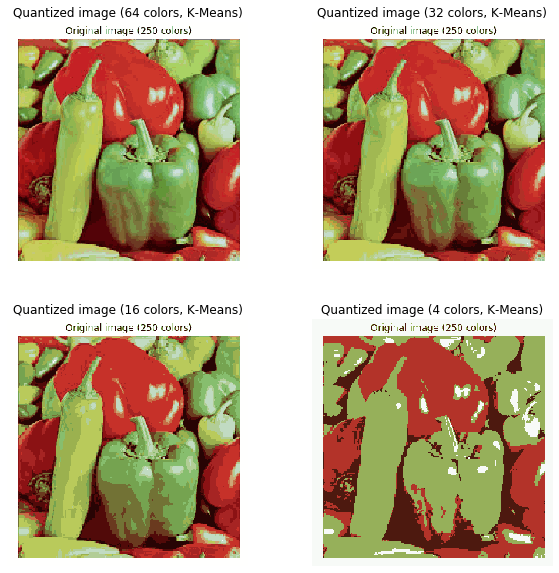

In [6]:
plt.figure(2, figsize=(10,10))
plt.clf()
i = 1
for k in [64, 32, 16, 4]:
    t0 = time()
    plt.subplot(2,2,i)
    plt.axis('off')
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=k, random_state=0).fit(image_array_sample)
    print("done in %0.3fs." % (time() - t0))
    # Get labels for all points
    print("Predicting color indices on the full image (k-means)")
    t0 = time()
    labels = kmeans.predict(image_array)
    print("done in %0.3fs." % (time() - t0))
    plt.title('Quantized image (' + str(k) + ' colors, K-Means)')
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
    i += 1
plt.show()

Predicting color indices on the full image (random)
done in 0.105s.
Predicting color indices on the full image (random)
done in 0.038s.
Predicting color indices on the full image (random)
done in 0.020s.
Predicting color indices on the full image (random)
done in 0.012s.


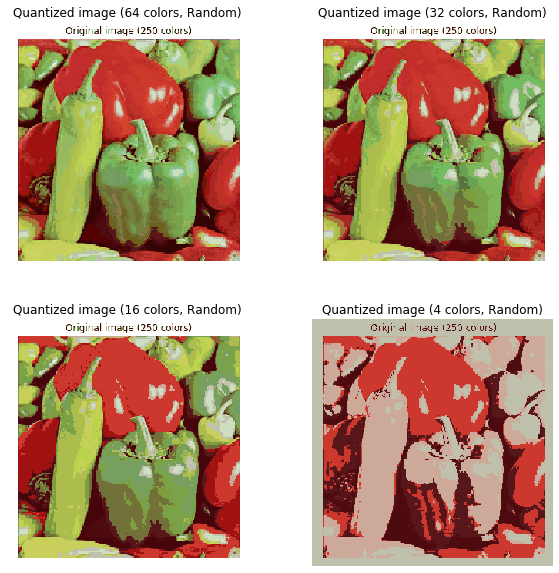

In [7]:
plt.figure(3, figsize=(10,10))
plt.clf()
i = 1
for k in [64, 32, 16, 4]:
    t0 = time()
    plt.subplot(2,2,i)
    plt.axis('off')
    codebook_random = shuffle(image_array, random_state=0)[:k + 1]
    print("Predicting color indices on the full image (random)")
    t0 = time()
    labels_random = pairwise_distances_argmin(codebook_random,
                                              image_array,
                                              axis=0)
    print("done in %0.3fs." % (time() - t0)) 
    plt.title('Quantized image (' + str(k) + ' colors, Random)')
    plt.imshow(recreate_image(codebook_random, labels_random, w, h))
    i += 1
plt.show()

## Color Quantization with OpenCV

In [14]:
# import the necessary packages
from sklearn.cluster import MiniBatchKMeans
import numpy as np
import argparse
import cv2

In [27]:
# load the image and grab its width and height
image = cv2.imread('./images/input/veg.png')
(h, w) = image.shape[:2]
 
# convert the image from the RGB color space to the L*a*b*
# color space -- since we will be clustering using k-means
# which is based on the euclidean distance, we'll use the
# L*a*b* color space where the euclidean distance implies
# perceptual meaning
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
 
# reshape the image into a feature vector so that k-means
# can be applied
image = image.reshape((image.shape[0] * image.shape[1], 3))
 
# apply k-means using the specified number of clusters and
# then create the quantized image based on the predictions
clt = MiniBatchKMeans(n_clusters = 3)
labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]
 
# reshape the feature vectors to images
quant = quant.reshape((h, w, 3))
image = image.reshape((h, w, 3))
 
# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)
 
# display the images and wait for a keypress
cv2.imshow("image", np.hstack([image, quant]))
cv2.imwrite('./images/output/colorquanti.jpg',np.hstack([image, quant]))
cv2.waitKey(0)

-1

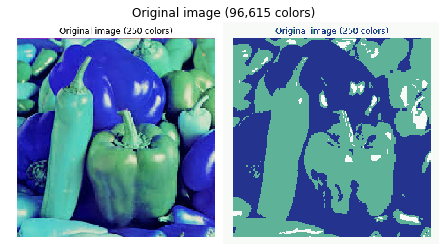

In [28]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(np.hstack([image, quant]))

## Color Quantization using K-Means Sklearn

In [9]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

Automatically created module for IPython interactive environment


In [16]:
n_colors = 16

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

Fitting model on a small sub-sample of the data
done in 0.129s.


In [17]:
# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))


codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))


Predicting color indices on the full image (k-means)
done in 0.056s.
Predicting color indices on the full image (random)
done in 0.050s.


In [18]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

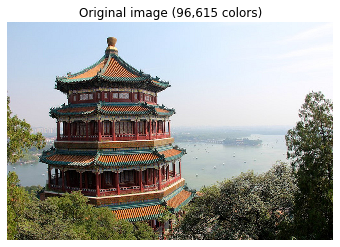

In [19]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

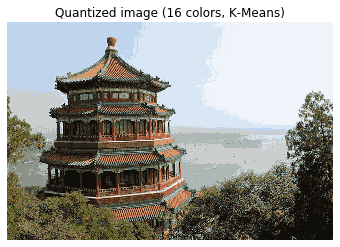

In [23]:
plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (16 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

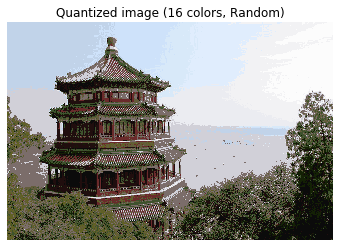

In [22]:
plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (16 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()